In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px



## 1.Project Objective
    Ojective - Analyze if a higher percentage discount affects the customer rating of a product 

    Data Source - https://www.kaggle.com/datasets/yamrajmusic/blinkit-products-dataset
    
    

## 2. Data Collection and Loading 

In [4]:
#Load Data 
data_df = pd.read_csv("Blinkit Products.csv")

In [5]:
#Initial Check 
data_df.head()


,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


In [6]:
#shape of data
print("The dataset contains", data_df.shape[0],"rows and", data_df.shape[1],"columns")

The dataset contains 27555 rows and 9 columns


In [7]:
#column names
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.9+ MB


In [8]:
#focus on a few columns and drop the rest
#removed sub_catagory
data_df.drop("sub_category", inplace=True, axis=1)

In [9]:
#focus on a few columns and drop the rest
#removed type
data_df.drop("type", inplace=True, axis=1)

## 3. Data Cleaning and Preparation

In [10]:
#Missing values
data_df.isnull().sum()

index              0
product            1
category           0
brand              1
sale_price         0
market_price       0
rating          8626
dtype: int64

In [11]:
#Only one brand missing, dropping that row
data_df = data_df.dropna(subset=["brand"])

In [12]:
#Only one product missing, dropping that row
data_df = data_df.dropna(subset=["product"])

In [13]:
#removing rows without ratings 
data_df = data_df.dropna(subset=["rating"])

In [14]:
#check to see if null values have been removed 
data_df.isnull().sum()

index           0
product         0
category        0
brand           0
sale_price      0
market_price    0
rating          0
dtype: int64

In [ ]:
#Data Type Adjustments

In [15]:
#Feature Engineering 
#Calculate the precentage discount offered 
data_df['Discount_Percentage'] = ((data_df['market_price'] - data_df['sale_price']) / data_df['market_price']) * 100
data_df

,index,product,category,brand,sale_price,market_price,rating,Discount_Percentage
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Sri Sri Ayurveda,220.00,220.0,4.1,0.000000
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Mastercook,180.00,180.0,2.3,0.000000
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Trm,119.00,250.0,3.4,52.400000
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Nakoda,149.00,176.0,3.7,15.340909
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Nivea,162.00,162.0,4.4,0.000000
...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Layerr,199.20,249.0,3.9,20.000000
27551,27552,Rosemary,Gourmet & World Food,Puramate,67.50,75.0,4.0,10.000000
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,FabBox,200.00,200.0,3.8,0.000000
27553,27554,Green Tea - Pure Original,Beverages,Tetley,396.00,495.0,4.2,20.000000


## 4. Exploratory Data Analysis 

In [16]:
#Descriptive Statics
summary_stats = data_df.describe()
summary_stats

,index,sale_price,market_price,rating,Discount_Percentage
count,18928.000000,18928.000000,18928.000000,18928.000000,18928.000000
mean,13793.933168,267.775174,322.172169,3.943396,11.743833
std,7956.223328,364.310489,459.980876,0.739080,14.551087
min,1.000000,3.000000,3.000000,1.000000,0.000000
25%,6865.500000,85.000000,96.000000,3.700000,0.000000
50%,13767.500000,165.000000,195.500000,4.100000,5.000000
75%,20673.250000,306.000000,370.000000,4.300000,20.000000
max,27555.000000,6660.000000,7400.000000,5.000000,82.506266


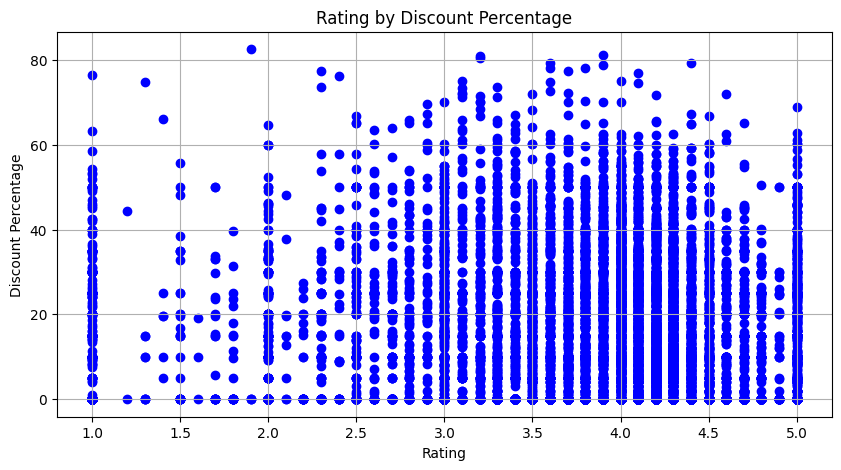

In [44]:
#Data Visualizations
#rating based on discount percentage
# Plotting price vs rating 
plt.figure(figsize=(10, 5)) 
plt.scatter(data_df['rating'], data_df['Discount_Percentage'], color='blue', marker='o') 
plt.title('Rating by Discount Percentage') 
plt.xlabel('Rating') 
plt.ylabel('Discount Percentage') 
plt.grid(True) 
plt.show()

## 5.Analysis and Insights
Findings 
   Based on the scatter chart it does not appear that the offering of a discount improves the ratings.  
Supporting Data
    Reference specific statistics or plot features to back up findings. 

## 6. Conclusion and Recommendations
Summarize 
    Additonal charts such a trend line or histogram might provide additional insights into the data.  But based on the scatterplot no strong connection between the offering of a discount and the increase in rating can be determined.  